In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import os, fnmatch
from pathlib import Path
# import mtcnn
from mtcnn.mtcnn import MTCNN

# For Default fps

In [ ]:
def extract_multiple_videos(input_filenames, image_path_infile):
    """
    Extract video files into sequence of images.
    
    Args:
    input_filenames (str or list): Path to video file or list of video file paths
    image_path_infile (str): Directory to save extracted frames
    """
    # Ensure the output directory exists
    os.makedirs(image_path_infile, exist_ok=True)
    
    # Handle single filename or list of filenames
    if isinstance(input_filenames, str):
        input_filenames = [input_filenames]
    
    # Counter for unique frame naming across multiple videos
    global_counter = 1
    
    # Iterate through each video file
    for video_path in input_filenames:
        # Open the video capture
        cap = cv2.VideoCapture(video_path)
        
        # Check if video opened successfully
        if not cap.isOpened():
            print(f"Error opening video file: {video_path}")
            continue
        
        # Extract frames from current video
        while True:
            ret, frame = cap.read()
            
            if not ret:
                # No more frames to read
                break
            
            # Generate unique filename for each frame
            frame_filename = os.path.join(image_path_infile, f'{global_counter}.jpg')
            
            # Save the frame
            cv2.imwrite(frame_filename, frame)
            
            # Optional: Display frame (uncomment if needed)
            # cv2.imshow('frame', frame)
            
            # Increment global counter
            global_counter += 1
        
        # Release the video capture object
        cap.release()
    
    # Close any open windows
    cv2.destroyAllWindows()


# FOR 1fps

In [57]:
def extract_multiple_videos1(input_filenames, image_path_infile, frame_interval=1):
    """
    Extract video files into a sequence of images at specified intervals.
    
    Args:
    input_filenames (str or list): Path to video file or list of video file paths
    image_path_infile (str): Directory to save extracted frames
    frame_interval (int): Number of seconds between extracted frames
    """
    # Ensure the output directory exists
    os.makedirs(image_path_infile, exist_ok=True)
    
    # Handle single filename or list of filenames
    if isinstance(input_filenames, str):
        input_filenames = [input_filenames]
    
    # Counter for unique frame naming across multiple videos
    global_counter = 1
    
    # Iterate through each video file
    for video_path in input_filenames:
        # Open the video capture
        cap = cv2.VideoCapture(video_path)
        
        # Check if video opened successfully
        if not cap.isOpened():
            print(f"Error opening video file: {video_path}")
            continue
        
        # Get the frames per second (fps) of the video
        fps = cap.get(cv2.CAP_PROP_FPS)
        
        # Calculate the interval in terms of frame count
        frame_count_interval = int(fps * frame_interval)

        # Initialize frame index
        frame_index = 0
        
        # Extract frames from current video
        while True:
            ret, frame = cap.read()
            
            if not ret:
                # No more frames to read
                break
            
            # Save only the frames at the specified interval
            if frame_index % frame_count_interval == 0:
                # Generate unique filename for each frame
                frame_filename = os.path.join(image_path_infile, f'{global_counter}.jpg')
                
                # Save the frame
                cv2.imwrite(frame_filename, frame)
                
                # Increment global counter
                global_counter += 1
            
            # Increment frame index
            frame_index += 1
        
        # Release the video capture object
        cap.release()
    
    # Close any open windows
    cv2.destroyAllWindows()

In [58]:
extract_multiple_videos1("D.mp4", "C:\\Users\\jeetg\\code\\DeepFake Detection")
extract_multiple_videos1("A.mp4", "C:\\Users\\jeetg\\code\\DeepFake Detection")

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
import cv2

def mse(imageA, imageB):
    # Calculate the Mean Squared Error between the two images
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err  # return the MSE

def compare_images(imageA_path, imageB_path, title, threshold=0.5, mse_threshold=1000):
    # Read the images using OpenCV
    imageA = cv2.imread(imageA_path)
    imageB = cv2.imread(imageB_path)

    # Check if images are loaded properly
    if imageA is None or imageB is None:
        print("Error: One of the images did not load.")
        return

    # Print the dimensions of the images
    print(f"Image A dimensions: {imageA.shape}")
    print(f"Image B dimensions: {imageB.shape}")

    # Convert images to grayscale for SSIM calculation
    imageA_gray = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    imageB_gray = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

    # Check if images are too small for SSIM calculation
    if imageA_gray.shape[0] < 7 or imageA_gray.shape[1] < 7 or imageB_gray.shape[0] < 7 or imageB_gray.shape[1] < 7:
        print("Error: One of the images is too small for SSIM calculation.")
        return

    # Compute SSIM with multiple approaches
    try:
        # Approach 1: Using grayscale images
        s_gray = ssim(imageA_gray, imageB_gray)

        # Compute the mean squared error
        m = mse(imageA, imageB)

        # Setup the figure for displaying results
        print(f"{title} - MSE: {m:.2f}")
        print(f"SSIM (Grayscale): {s_gray:.2f}")

        # Determine which image is fake based on the SSIM score
        if s_gray < threshold or m > mse_threshold:
            fake_image = "Image B is considered fake."
        else:
            fake_image = "No image is considered fake."

        # Setup the figure
        fig = plt.figure(title)
        plt.suptitle(f"MSE: {m:.2f}, SSIM: {s_gray:.2f}\n{fake_image}")

        # Show the first image
        ax = fig.add_subplot(1, 2, 1)
        plt.imshow(imageA_gray, cmap=plt.cm.gray)
        plt.axis("off")
        plt.title("Image A")

        # Show the second image
        ax = fig.add_subplot(1, 2, 2)
        plt.imshow(imageB_gray, cmap=plt.cm.gray)
        plt.axis("off")
        plt.title("Image B")

        # Show the images
        plt.show()

        return s_gray

    except Exception as e:
        print(f"Error calculating SSIM: {e}")



Image A dimensions: (224, 224, 3)
Image B dimensions: (224, 224, 3)
detect - MSE: 1610.67
SSIM (Grayscale): 0.76


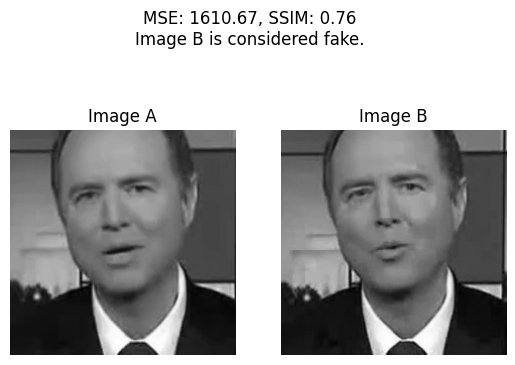

0.7631870101187045

In [60]:
os.chdir("C:\\Users\\jeetg\\code\\DeepFake Detection")
compare_images("1.jpg","8.jpg","detect")